In [1]:
import os

def cls():
    os.system(['clear','cls'][os.name == 'nt'])

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time
import random

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
def square(list):
    return [i ** 2 for i in list]

def distr(N, r):
    x=0
    y=0
    z=0
    G=[]
    M=[]
    for i in range(int(N)):
        x=random.uniform(-r/2, r/2)
        y=random.uniform(-r/2, r/2)
        z=random.uniform(0, r)
        G.append([x, y, z])
    a=[]
    for j in range(len(G)):  
        a.append(np.sqrt(G[j][0]**2+G[j][1]**2+G[j][2]**2))
    
    for k in range(int(N)):  
            
        val, idx = min((val, idx) for (idx, val) in enumerate(a))
        M.append(G[idx])
        G.remove(G[idx])
        a.remove(a[idx])
       
    return M

2209.91671701


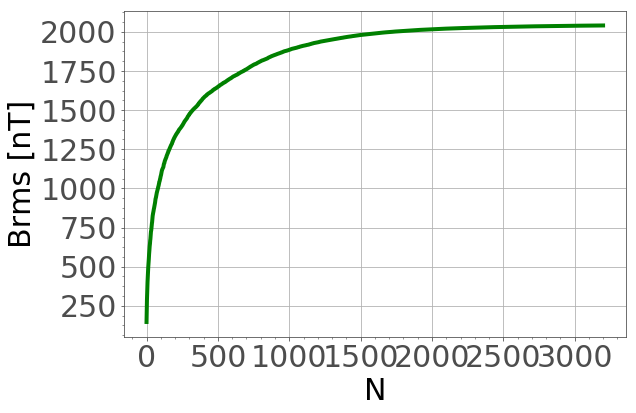

In [20]:
d=2.0*1e-9
r=4*1e-9 

g_H1=42.576*1e+6 
mu_0=np.pi*4e-7 
plank_constant=1.05457180013e-34 
mu_p = 1.41060674333*1e-26 

C=mu_0*mu_p/(4*np.pi)

ex=np.array([1, 0, 0])/np.sqrt(3)
ey=np.array([0, 1, 0])/np.sqrt(3)
ez=np.array([0, 0, 1])/np.sqrt(3)

rho=5*1e+28 

Brms_H1=[]
N=rho*r**3
Brms=[]
X=[]
Y=[]
Z=[]
RR=[]

H=distr(N, r)

gamma=54.7*np.pi/180
q=np.array([0, np.sin(gamma), np.cos(gamma)])

for k in range(int(N)):

    x=H[k][0]
    y=H[k][1]
    z=H[k][2]+d

    X.append(x)
    Y.append(y)
    Z.append(z)

    R=np.sqrt(x**2+y**2+z**2)
    RR.append(R)

    n=np.array([x, y, z])/R

    G=3*(np.dot(n, q)**2)-1

    Brms.append(C/(R**3))

    M=np.sqrt(np.sum(square(Brms)))*1e+9
    Brms_H1.append(M)

Brms=(1/(8*np.sqrt(2*np.pi)))*mu_0*mu_p*np.sqrt(rho)/d**1.5

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)

ax.plot(range(int(N)), Brms_H1, 'g-', linewidth=4., markersize=1.)

ax.set_ylabel('Brms [nT]')
ax.set_xlabel('N')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_yticklabels()+ ax.get_xticklabels()):
    item.set_fontsize(30) 
plt.show()

print(Brms*1e+9)

In [1]:
N=40000

g_H1=42.576*1e+6*2*np.pi 
mu_0=np.pi*4e-7 
plank_constant=1.05457180013e-34 
mu_p = 1.41060674333*1e-26 
gammaNV = 2.8*10**10*2*np.pi

r=(mu_0*gammaNV*g_H1*plank_constant*np.sqrt(N)*120*1e-6/(8*np.pi**2))**(1/3)
print(r)

1.23764678351e-08


In [59]:
A=2*np.pi/(120*1e-6)
print(A)

52359.87755982989


In [60]:
r3 = mu_0*gammaNV*g_H1*plank_constant*np.sqrt(N)/(4*np.pi*A)
print(r3)

4.80209133228e-26


In [61]:
r3**(1/3)

3.6347689149933574e-09

In [64]:
print(np.sqrt(N))

200.0
